# Design of a linear regression model for car price prediction.


### Import Libraries

In [3]:
# Answer Here
import pandas as pd
import numpy as np 
import seaborn as sns 
import warnings 
import matplotlib.pyplot as plt 
%matplotlib inline 
warnings.filterwarnings('ignore')

### Loading the Dataset "cars.csv"

This dataset contains information about used cars.

The columns in the given dataset is as follows:

1. car brand name: Car Name
2. car age: Number of years since the car was baught.
3. **selling_price ($): The price the owner wants to sell the car at.**
4. seats: Number of seats.
5. km_driven: This is the distance completed by the car in km.
6. fuel: Fuel Type (Petrol/Diesel)
7. seller_type: Seller Type (Dealer/Individual)
8. transmission: Transmission Type (Manual/Automatic)
9. owner: Defines the number of owners the car has previously had.
10. mileage: Nubmer of Miles.
11. engine : Engine Type.
12. max_power: Horse Power.
13. torque: Engine’s rotational force.

The objective is to build a linear regression model and predict car selling prices based on provided features.
Essentially, we want to predict the **selling_price** column.

**Read in the "cars.csv" file**.

In [4]:
df = pd.read_csv("cars.csv")

**Show the first 5 lines of the dataset**

In [5]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,15


**Show the number of lines and number of columns in the dataset**

In [6]:
df.shape

(8128, 12)

**How many Textual Features ? How many Numeric Features?**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selling_price   8128 non-null   int64  
 1   km_driven       8128 non-null   int64  
 2   fuel            8128 non-null   object 
 3   seller_type     8128 non-null   object 
 4   transmission    8128 non-null   object 
 5   owner           8128 non-null   object 
 6   mileage         7907 non-null   float64
 7   engine          7907 non-null   float64
 8   max_power       7912 non-null   float64
 9   seats           7907 non-null   float64
 10  car_brand_name  8128 non-null   object 
 11  car_age         8128 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


**Check whether there are null values in the dataset (per column)**

In [17]:
# Answer Here
df.isnull().sum()

selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           221
engine            221
max_power         216
seats             221
car_brand_name      0
car_age             0
dtype: int64

**Give a statistical overview of Numeric Features.**

In [27]:
# Answer Here
df.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age
count,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000,8128.000000
mean,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719,8.195989
std,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588,4.044249
min,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000,2.000000
25%,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,5.000000
50%,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,7.000000
75%,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000,11.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,39.000000


**Answer the following questions:**
1. What is the oldest and newest car: provide the min and max age.
2. What is the minimum and maximum selling price ?
3. What is the minimum and maximum number of seats ?

In [33]:
# Answer Here
oldest_car=df[df["car_age"]==df["car_age"].max()]
oldest_car

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
316,300000,10000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,Mahindra,39


In [34]:
# Answer Here
newest_car=df[df["car_age"]==df["car_age"].min()]
newest_car

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
106,400000,5000,Petrol,Individual,Manual,Second Owner,19.00,1194.0,94.68,5.0,Ford,2
115,475000,13000,Petrol,Individual,Manual,First Owner,21.63,998.0,67.04,5.0,Maruti,2
196,720000,5000,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.86,5.0,Hyundai,2
224,524000,32000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,Hyundai,2
402,409999,35000,CNG,Individual,Manual,First Owner,20.88,1196.0,61.70,5.0,Maruti,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7492,500000,1000,Petrol,Individual,Manual,First Owner,20.30,1086.0,68.07,5.0,Hyundai,2
7507,800000,25000,Diesel,Individual,Manual,First Owner,21.66,1498.0,108.62,5.0,Volkswagen,2
7586,600000,5000,Petrol,Individual,Automatic,First Owner,20.89,1197.0,81.80,5.0,Maruti,2
7589,445000,1000,Petrol,Individual,Manual,First Owner,21.21,1197.0,81.80,5.0,Maruti,2


### Exploratory Data Analysis and Visualization

**Provide a barplot of the selling price**

<AxesSubplot:>

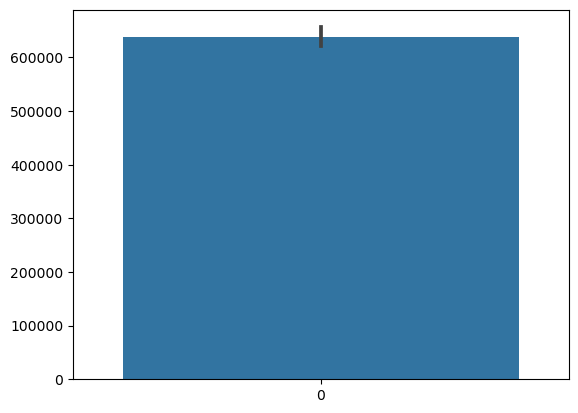

In [107]:
# Answer Here 
#!!!!!!!²
sns.barplot(data=df["selling_price"])

**Provide a boxplot of the mileage column**

<AxesSubplot:xlabel='mileage'>

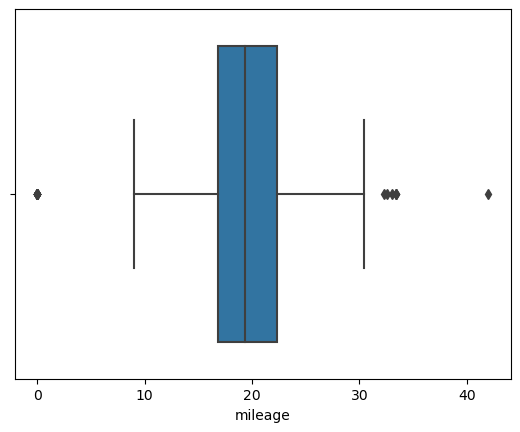

In [39]:
# Answer Here
sns.boxplot(df["mileage"])

**Provide a histogram of cars max power**

<AxesSubplot:xlabel='max_power', ylabel='Count'>

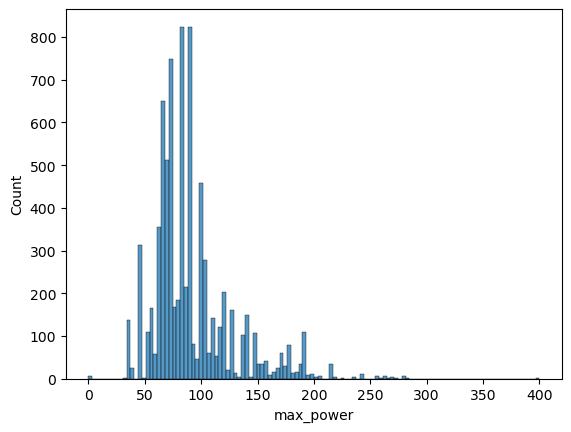

In [43]:
# Answer Here
sns.histplot(df["max_power"])

**Provide a historgram of the car age**

<AxesSubplot:xlabel='car_age', ylabel='Count'>

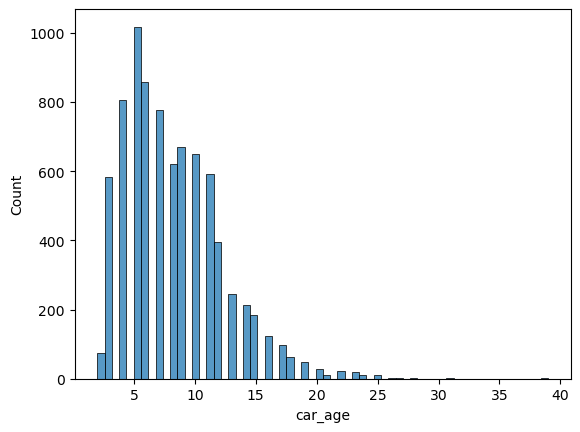

In [44]:
# Answer Here
sns.histplot(df["car_age"])

**Provide a countplot of the fuel type**

<AxesSubplot:xlabel='fuel', ylabel='count'>

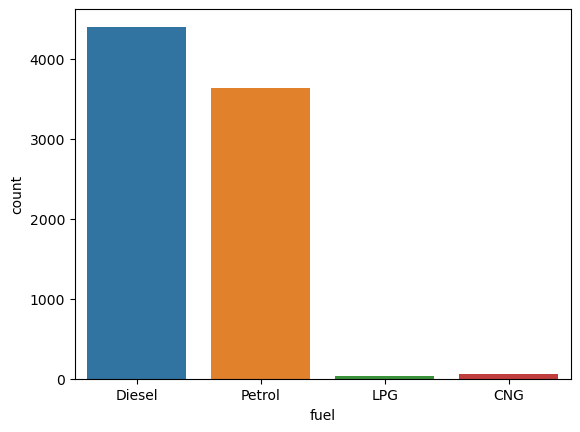

In [45]:
# Answer Here
sns.countplot(df["fuel"])

**Provide a countplot of the transmission type**

<AxesSubplot:xlabel='transmission', ylabel='count'>

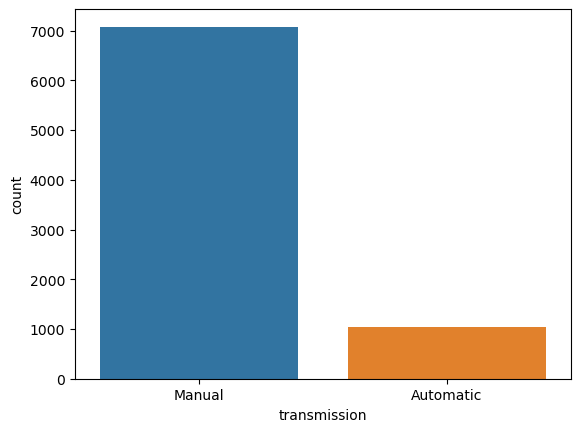

In [46]:
# Answer Here
sns.countplot(df["transmission"])

**Provide a barplot of the selling price and the number of owners**

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

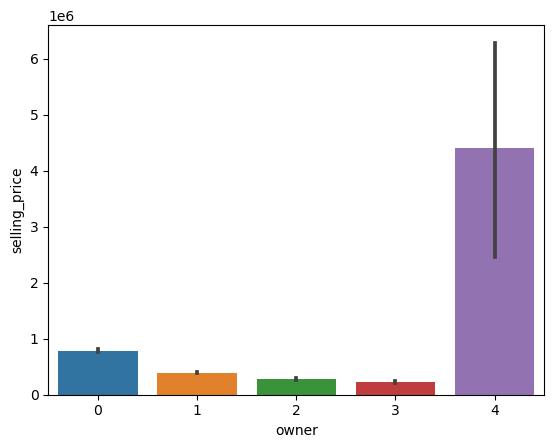

In [108]:
# Answer Here
sns.barplot(data=df, x="owner",y="selling_price")

**Provide a scatterplot that depicts the relationship of both max power and selling price**

<AxesSubplot:xlabel='selling_price', ylabel='max_power'>

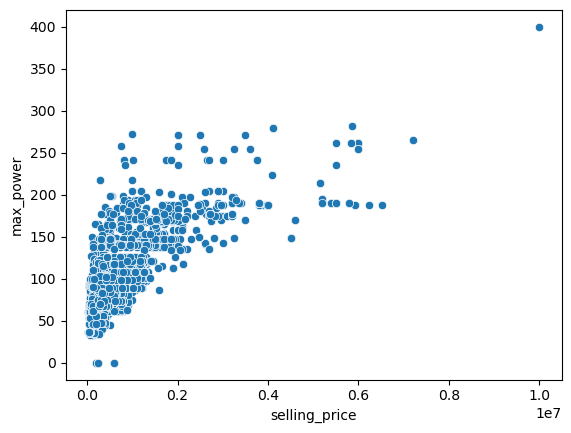

In [49]:
# Answer Here
sns.scatterplot(data=df,x="selling_price",y="max_power")

**Provide a scatterplot that depicts the relationship of both the engine and max power**

<AxesSubplot:xlabel='engine', ylabel='max_power'>

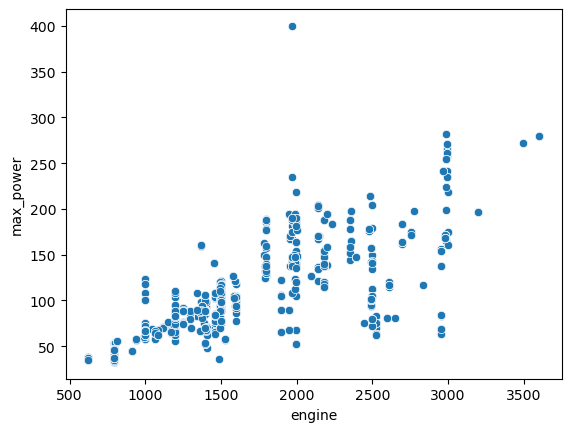

In [50]:
# Answer Here
sns.scatterplot(data=df,x="engine",y="max_power")

**Plot the Correlation between columns in a heatmap. Note: Display correlation values**

<AxesSubplot:>

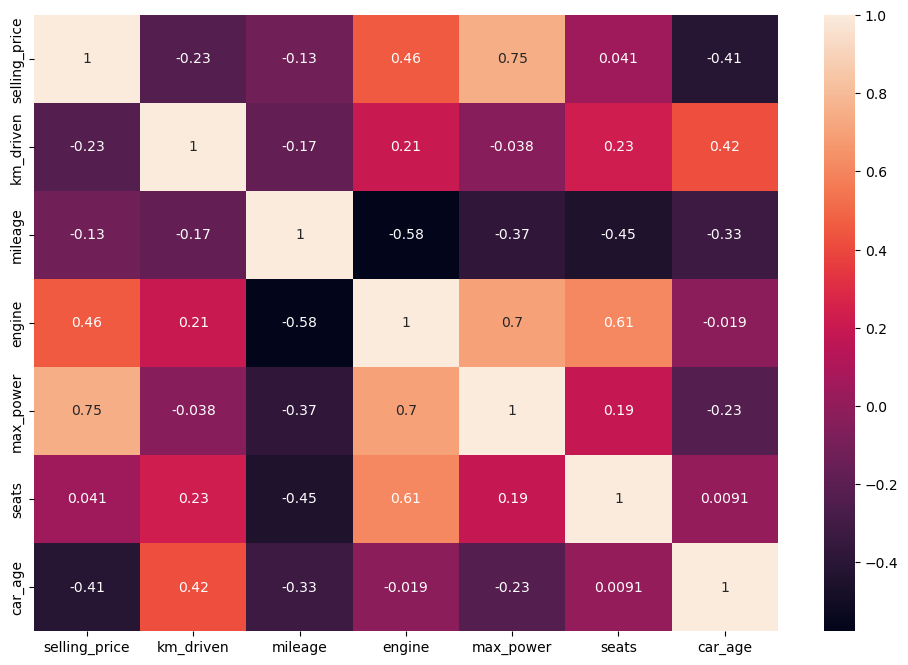

In [54]:
# Answer Here
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

### Feature Engineering


**Drop the car brand name column.**

In [57]:
# Answer Here
X=df.drop("car_brand_name",axis=1)
X

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,9
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,15
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,13
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,9


**Replace missing data in mileage with average values**

In [84]:
# Answer Here
df["mileage"].fillna(df["mileage"].mean(),inplace=True)

**Replace missing data in max_power with average values**

In [65]:
# Answer Here
df["max_power"].fillna(df["max_power"].mean(),inplace=True)

**Replace missing data in engine with median values**

In [66]:
# Answer Here
df["engine"].fillna(df["engine"].median(),inplace=True)

**Replace missing data in seats with median values**

In [67]:
# Answer Here
df["seats"].fillna(df["seats"].median(),inplace=True)

**Convert categorical data in fuel column to the following values:**

* Diesel: 0 
* Petrol: 1
* CNG: 2
* LPG: 3


In [69]:
# Answer Here
fuel_dict={"Diesel":0,"Petrol":1,"CNG":2,"LPG":3}
df["fuel"]=df["fuel"].map(fuel_dict)

**Convert categorical data in seller_type column to the following values:**

* Individual: 0 
* Dealer: 1
* Trustmark Dealer: 2

In [70]:
# Answer Here
# Answer Here
seller_type_dict={"Individual":0,"Dealer":1,"Trustmark Dealer":2}
df["seller_type"]=df["seller_type"].map(seller_type_dict)

**Convert categorical data in transmission column to the following values:**

* Manual: 0 
* Automatic: 1

In [71]:
# Answer Here
transmission_dict={"Manual":0,"Automatic":1}
df["transmission"]=df["transmission"].map(transmission_dict)

**Convert categorical data in owner column to the following values:**

* First Owner: 0 
* Second Owner: 1
* Third Owner: 2
* Fourth & Above Owner: 3
* Test Drive Car: 3

In [72]:
# Answer Here
owner_dict={"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3,"Test Drive Car":4}
df["owner"]=df["owner"].map(owner_dict)

# Modeling

**Separate the data into dependent variable (label - y) and independent variables (estimator/features - X)**

In [86]:
# Answer Here
X=df.drop(["selling_price","car_brand_name"],axis=1)
y=df["selling_price"]

**Import the data spliting method from Scikit learn.**

In [87]:
# Answer Here
from sklearn.model_selection import train_test_split

**Split the dataset into x_train (y_train) and x_test (y_test) sets**

Select 20% for test set, and 80% for training.
It is critical to set random_state=1 in order to assure experiment reproducibility.

In [88]:
# Answer Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Import the simple linear regression model from scikit-learn.**

In [89]:
# Answer Here
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression model**

In [90]:
# Answer Here
model = LinearRegression()

**Train/fit model.**

In [91]:
# Answer Here
model.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [93]:
# Answer Here
model.coef_

array([-1.65489351e+00, -4.30015553e+04,  1.07598582e+05,  5.04346001e+05,
        3.22468479e+03,  2.01416207e+04, -5.28951924e+01,  1.45430164e+04,
        5.19717871e+04, -2.49301607e+04])

**Make prediction on test dataset**

In [95]:
# Answer Here
predictions=model.predict(X_test)

**Import evaluation metrics (Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) from Scikit learn.**

In [97]:
from sklearn import metrics

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [99]:
# Answer Here
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 259334.47074814243
MSE: 181693494696.19696
RMSE: 426255.19902541593


**What is the expected selling price of the following car ?**

    km_driven 73000
    fuel 0	  
    seller_type 0
    transmission 0	
    owner 1
    mileage 45
    engine 2775
    max_power 86
    seats 2
    car_age 9

In [104]:
# Answer Here
test=np.array([73000,0,0,0,1,45,2775,86,2,9]).reshape(1,-1)

In [105]:
answer=model.predict(test)

In [106]:
print(answer)

[744706.21565309]
